In [2]:
import graphviz as gv
with open("file 0502a.txt") as f:
  G = []
  for line in f:
    nums = [int(x) for x in line.split()]
    G.append([])
    for i in range(0, len(nums), 3):
      G[-1].append((nums[i], nums[i+1], nums[i+2]))

In [3]:
import heapq as hq
import numpy as np
import graphviz as gv
import math
def drawG_al(G, directed=False, weighted=True, path=[], layout="sfdp"):
  graph = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
  n = len(G)
  added = set()
  t = int
  bt = int

  for u in range(n):
    for v, w, b in G[u]:
      draw = False
      if not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed:
        draw = True

        
      if draw:
        t = 19
        if 6<=t<10:
          bt = b - 1
        if 10<=t<13:
          bt = b - 1
        elif 13<=t<16:
          bt = b
        elif 16<=t<20:
          bt = b + 1
        elif 20<=t<23:
          bt = b
          
        if weighted:
          if bt == 1:
            graph.edge(str(u), str(v), str(w),color="blue")     
          elif bt == 2:
            graph.edge(str(u), str(v), str(w),color="green")
          elif bt == 3:
            graph.edge(str(u), str(v), str(w),color="yellow")
          elif bt == 4:
            graph.edge(str(u), str(v), str(w),color="orange")       
          elif bt == 5:
            graph.edge(str(u), str(v), str(w),color="red")
        else:
          graph.edge(str(u), str(v))
  return graph

In [5]:
import math

indices = []
path = []
cost = []

def dijkstraList(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      if indices[u]!=-1:
        for v, w, b in G[u]:
          if not visited[v]:
            f = g + w
            if f < cost[v]:
              cost[v] = f
              path[v] = u
              hq.heappush(pqueue, (f, v))

  return path, cost

def routes(inicio,fin,path):
  r = []
  aux=fin
  c=inicio
  while inicio!=aux:
    p=path[aux]
    aux=p
    if(p!=inicio):
      r.append(aux)
  
  return r

def rShort(start,fin):
  cost = dijkstraList(G, start)
  aux = routes(start,fin,path)

  return aux,cost[fin]

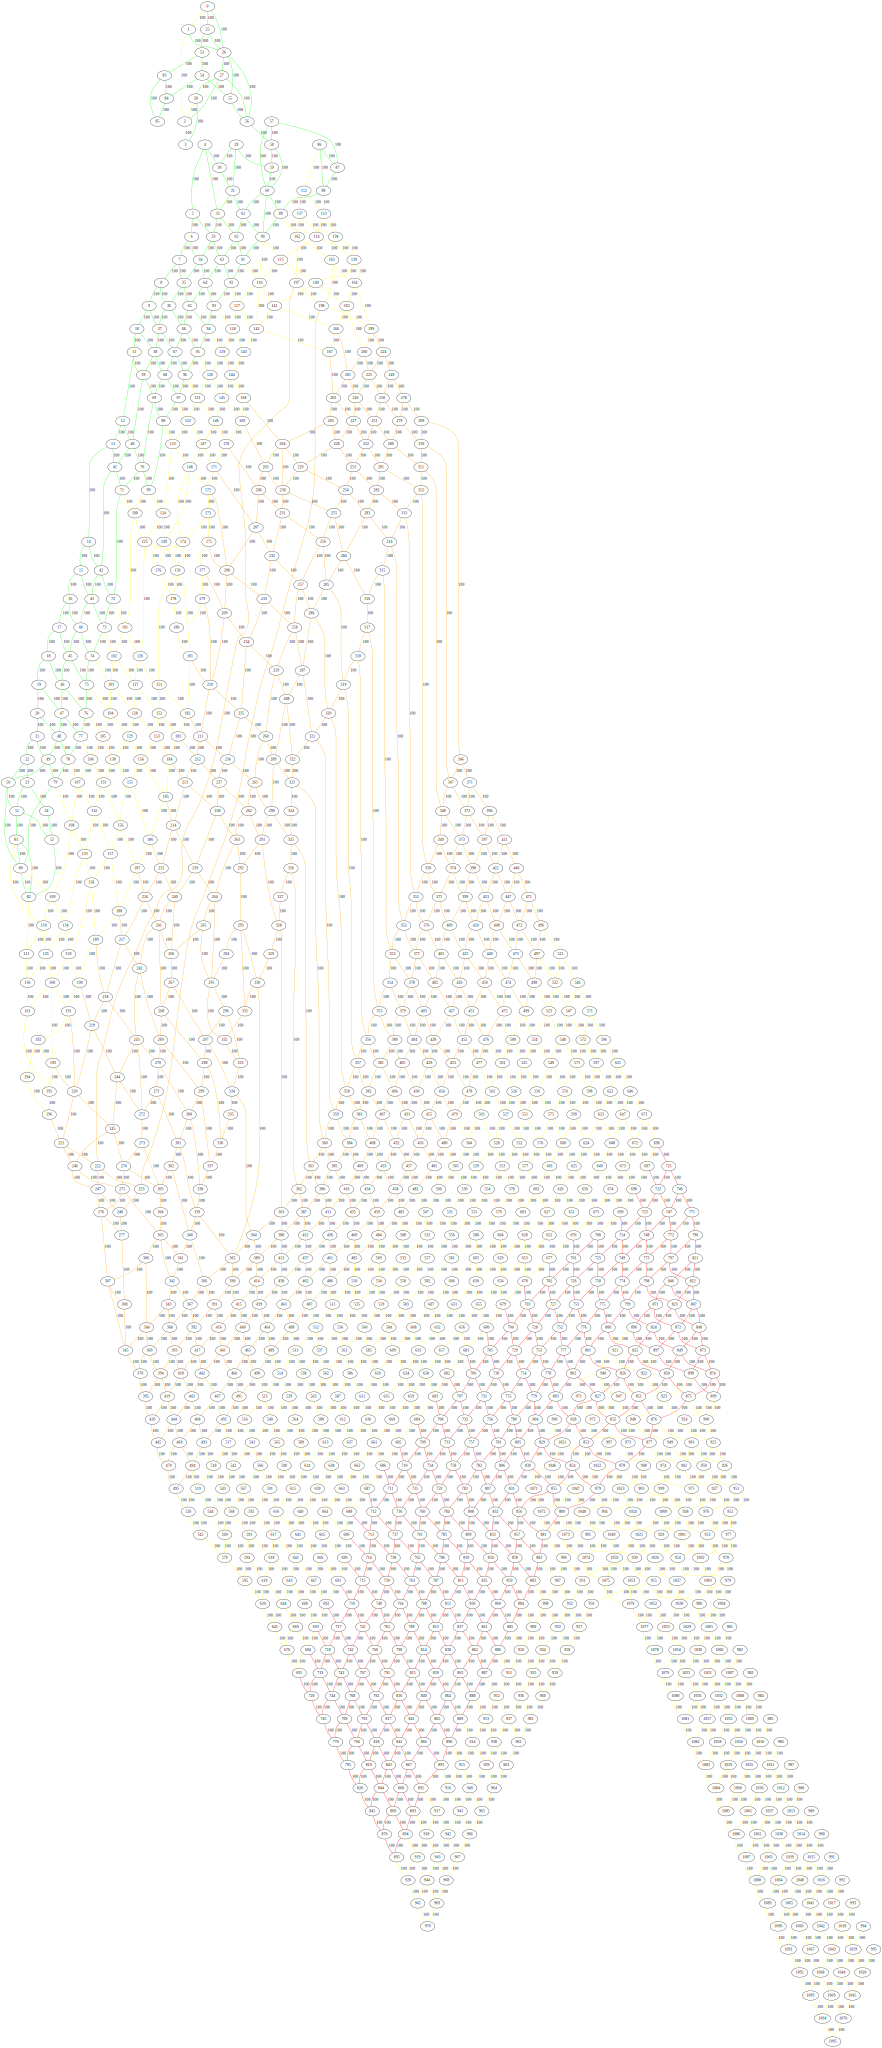

In [6]:
drawG_al(G)